# THE SPARKS FOUNDATION : GRADUATE ROTATIONAL INTERNSHIP PROGRAM (GRIP), SEPTEMBER 2023

# INTERNSHIP TASK 3 : Prediction Using Unsupervized ML

## PROBLEM STATEMENT

Data Source : https://bit.ly/3kXTdox

From the given 'Iris dataset predict the optimal number of clusters.

Represent it visually.

## SOLUTION

## AUTHOR : ARITRA BAG

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import gradio as gr

### IMPORTING DATASET

In [2]:
#Reading dataset from a .CSV file directly
dataset=pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### DROPPING REDUNDANT FEATURES

We remove the 'Id' column as it is not important while creating the classifier

In [3]:
dataset = dataset.drop(['Id'],axis = 1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EXPLORATORY DATA ANALYSIS

In [4]:
print('\nThe number of null values in the dataset is : \n' + str(dataset.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(dataset.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(dataset.info())
print('\nThe data distribution in the columns is given by :\n')
print(dataset.describe())
print('\nThe number of unique values in the Sepal Length cm column is : ' + str(len(dataset['SepalLengthCm'].unique())))
print('\nThe number of unique values in the Sepal Width cm column is : ' + str(len(dataset['SepalWidthCm'].unique())))
print('\nThe number of unique values in the Petal Length cm column is : ' + str(len(dataset['PetalLengthCm'].unique())))
print('\nThe number of unique values in the Petal Width cm column is : ' + str(len(dataset['PetalWidthCm'].unique())))
print('\nThe correlation coefficient between the features is :\n \n' + str(dataset.iloc[:,:-1].corr()) + '\n\n')


The number of null values in the dataset is : 
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

The number of duplicate values in the dataset is : 3

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

The data distribution in the columns is given by :

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594 

### GRAPHICAL REPRESENTATION OF THE DATASET

This gives us a visual representation of the dataset

Text(0.5, 1.0, 'Boxplot for Petal Width')

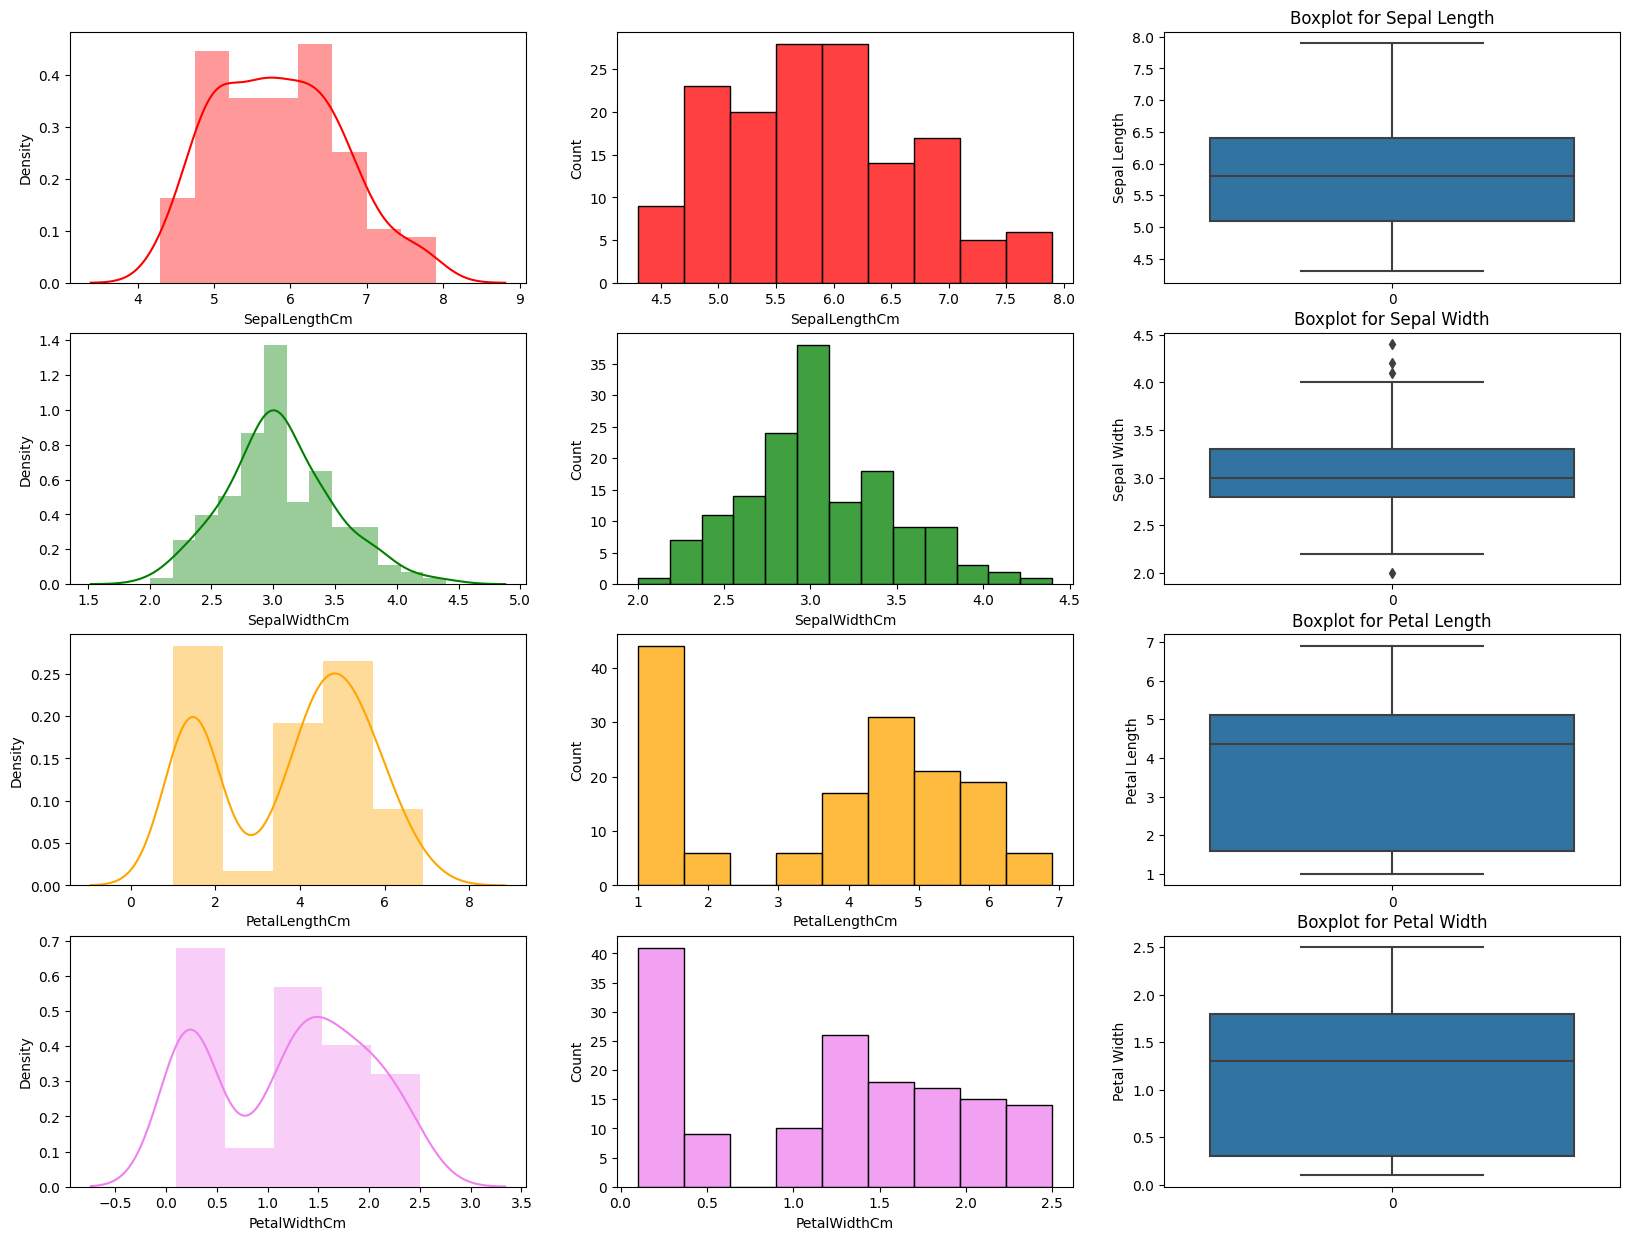

In [5]:
#Data Distribution
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (20,15))
plt.tight_layout(pad = 3.0)
plt.subplot(4,3,1)
sns.distplot(dataset['SepalLengthCm'],color = 'red')
plt.subplot(4,3,2)
sns.histplot(dataset['SepalLengthCm'],color = 'red')
plt.subplot(4,3,3)
sns.boxplot(dataset['SepalLengthCm'])
plt.ylabel('Sepal Length')
plt.title('Boxplot for Sepal Length')
plt.subplot(4,3,4)
sns.distplot(dataset['SepalWidthCm'],color = 'green')
plt.subplot(4,3,5)
sns.histplot(dataset['SepalWidthCm'],color = 'green')
plt.subplot(4,3,6)
sns.boxplot(dataset['SepalWidthCm'])
plt.ylabel('Sepal Width')
plt.title('Boxplot for Sepal Width')

plt.subplot(4,3,7)
sns.distplot(dataset['PetalLengthCm'],color = 'orange')
plt.subplot(4,3,8)
sns.histplot(dataset['PetalLengthCm'],color = 'orange')
plt.subplot(4,3,9)
sns.boxplot(dataset['PetalLengthCm'])
plt.ylabel('Petal Length')
plt.title('Boxplot for Petal Length')
plt.subplot(4,3,10)
sns.distplot(dataset['PetalWidthCm'],color = 'violet')
plt.subplot(4,3,11)
sns.histplot(dataset['PetalWidthCm'],color = 'violet')
plt.subplot(4,3,12)
sns.boxplot(dataset['PetalWidthCm'])
plt.ylabel('Petal Width')
plt.title('Boxplot for Petal Width')

<Axes: >

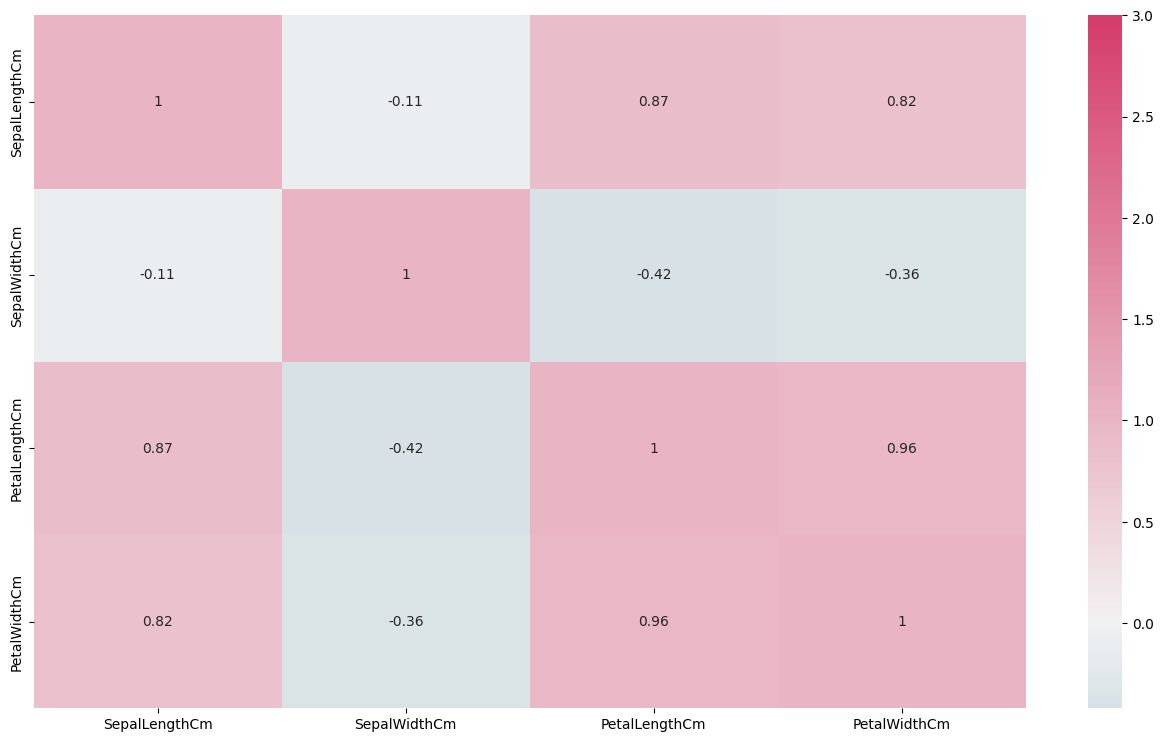

In [8]:
from numpy.lib.twodim_base import triu_indices_from
plt.figure(figsize = (16,9))
cmap = sns.diverging_palette(220,0, as_cmap = True)
sns.heatmap(dataset.iloc[:,:-1].corr(),cmap = cmap, center = 0, vmax = 3,annot = True)         

<Figure size 2000x1500 with 0 Axes>

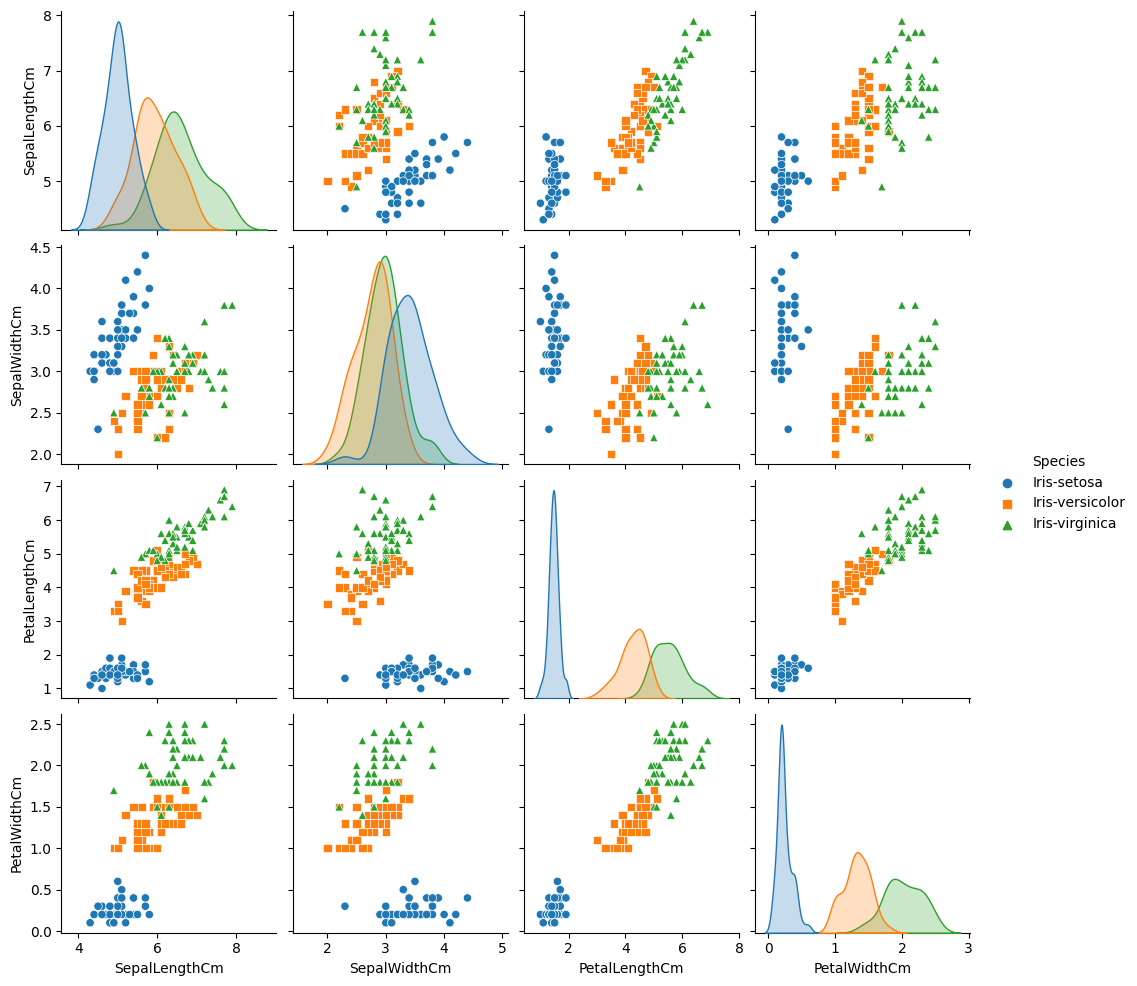

In [6]:
plt.figure(figsize = (20,15))
plt.tight_layout(pad = 3.0)
sns.pairplot(dataset, hue = 'Species', markers = ["o", "s", "^"])

### SPLITTING INTO THE X(FEATURES) AND Y(TARGET)

We divide the data into "attributes" (inputs or features or X values) and "labels" (outputs or target or Y values).

In [7]:
features = dataset.iloc[:,:-1].values
targets = dataset.iloc[:,-1].values

In [9]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
targets

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

### FINDING THE OPTIMAL NUMBER OF CLUSTERS

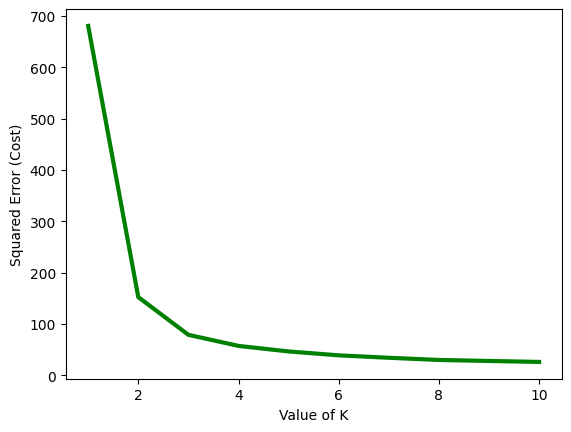

In [11]:
from sklearn.cluster import KMeans
cost =[]
for i in range(1, 11):
    clusters = KMeans(n_clusters = i, max_iter = 500)
    clusters.fit(features)
     
    # calculating the squared error for the clustered points
    cost.append(clusters.inertia_)    
 
# plotting the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()

#### The optimal number of clusters is 3

### CLUSTERSING WITH 3 CLUSTERS

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 0)
y_predicted = kmeans.fit_predict(features)

In [15]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### PLOTTING THE RESULTS

Using the first two columns i.e. Sepal Length and Sepal Width

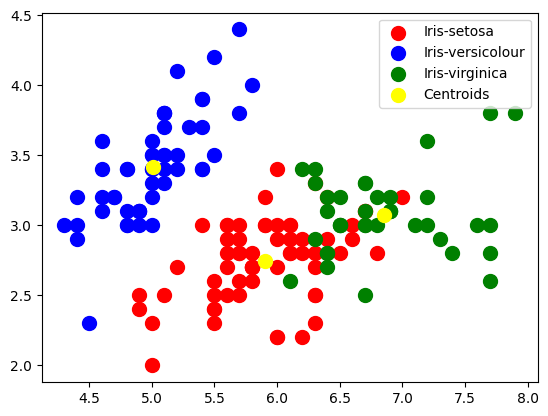

In [17]:
plt.scatter(features[y_predicted == 0, 0], features[y_predicted == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(features[y_predicted == 1, 0], features[y_predicted == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[y_predicted == 2, 0], features[y_predicted == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Using the last two columns, i.e. Petal Length and Petal Width

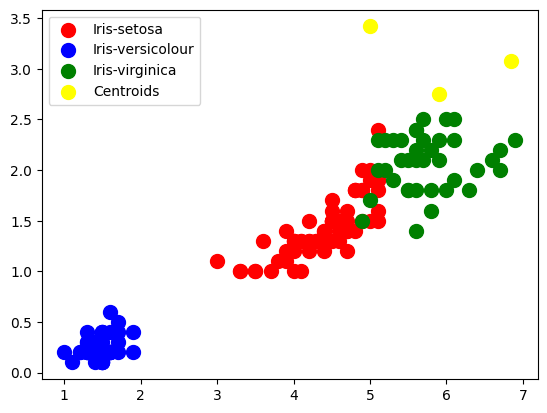

In [18]:
plt.scatter(features[y_predicted == 0, 2], features[y_predicted == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(features[y_predicted == 1, 2], features[y_predicted == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[y_predicted == 2, 2], features[y_predicted == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### SAVING THE MODEL

In [19]:
import pickle
pickle.dump(kmeans, open('/home/aritrabag/Documents/internship_projects/TSF/k_means/kmeans_cluster','wb'))